# Introduction
The store dataset provides comprehensive information about transactions occurring in various stores. This dataset is crucial for analyzing sales patterns, store performance, and promotional impacts. It includes detailed records of sales activities, store categories, and location-specific attributes. 
<font color = 'green'>
Content:
    
1. [Data Loading and Checking](#1)
    * [Data Description](#2)
    * [Bringing values ​​up to required standards](#3)
    * [Detection Outlier](#4)
1. [Data Filling](#5)
1. [Data Visualiton](#6)
1. [Encoding and Scaling for ML and DL](#7)
1. [Machine Learning and Deep Learning Methods](#8)
    
    
    



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


<a id ="1"></a>
# Data Loading and Checking

In [2]:
oil = pd.read_csv("/kaggle/input/store-dataset/oil.csv")
test = pd.read_csv("/kaggle/input/store-dataset/test.csv")
train = pd.read_csv("/kaggle/input/store-dataset/train.csv")
holidays_events = pd.read_csv("/kaggle/input/store-dataset/holidays_events.csv")
sample_submission = pd.read_csv("/kaggle/input/store-dataset/sample_submission.csv")
stores = pd.read_csv("/kaggle/input/store-dataset/stores.csv")
transactions = pd.read_csv("/kaggle/input/store-dataset/transactions.csv")


In [3]:
train = train.sample(frac=0.9, random_state=42)
#test = test.sample(frac=0.5, random_state=42)
#transactions = transactions.sample(frac=0.5, random_state=42)

train2 = train.copy()
test2 = test.copy()

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2700799 entries, 2483653 to 1356489
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 144.2+ MB


In [5]:
test.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [6]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [7]:
train

,id,date,store_nbr,family,sales,onpromotion
2483653,2483653,2016-10-28,46,CLEANING,2576.000,61
2761877,2761877,2017-04-03,52,DAIRY,0.000,0
1217988,1217988,2014-11-16,33,MEATS,357.354,2
1231938,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0
528175,528175,2013-10-24,29,EGGS,0.000,0
...,...,...,...,...,...,...
623515,623515,2013-12-16,53,GROCERY II,0.000,0
869696,869696,2014-05-05,11,HARDWARE,0.000,0
2139740,2139740,2016-04-18,46,LAWN AND GARDEN,0.000,0
20053,20053,2013-01-12,21,"LIQUOR,WINE,BEER",0.000,0


In [8]:
test

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [9]:
transactions

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [10]:
holidays_events

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [11]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [12]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [13]:
transactions['date'] = pd.to_datetime(transactions['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
test['date'] = pd.to_datetime(test['date'])

merged_df_train = pd.merge(train, holidays_events, on='date', how='left')
merged_df_train2 = pd.merge(merged_df_train, stores, on='store_nbr', how='left')
merged_df_train3 = pd.merge(merged_df_train2, transactions, on=['date', 'store_nbr'], how='left')


In [14]:
merged_df_train

,id,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,2483653,2016-10-28,46,CLEANING,2576.000,61,NaN,NaN,NaN,NaN,NaN
1,2761877,2017-04-03,52,DAIRY,0.000,0,NaN,NaN,NaN,NaN,NaN
2,1217988,2014-11-16,33,MEATS,357.354,2,NaN,NaN,NaN,NaN,NaN
3,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,NaN,NaN,NaN,NaN,NaN
4,528175,2013-10-24,29,EGGS,0.000,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2748968,623515,2013-12-16,53,GROCERY II,0.000,0,NaN,NaN,NaN,NaN,NaN
2748969,869696,2014-05-05,11,HARDWARE,0.000,0,NaN,NaN,NaN,NaN,NaN
2748970,2139740,2016-04-18,46,LAWN AND GARDEN,0.000,0,Event,National,Ecuador,Terremoto Manabi+2,False
2748971,20053,2013-01-12,21,"LIQUOR,WINE,BEER",0.000,0,Work Day,National,Ecuador,Recupero puente primer dia del ano,False


In [15]:
merged_df_train2

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster
0,2483653,2016-10-28,46,CLEANING,2576.000,61,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,A,14
1,2761877,2017-04-03,52,DAIRY,0.000,0,NaN,NaN,NaN,NaN,NaN,Manta,Manabi,A,11
2,1217988,2014-11-16,33,MEATS,357.354,2,NaN,NaN,NaN,NaN,NaN,Quevedo,Los Rios,C,3
3,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,NaN,NaN,NaN,NaN,NaN,Salinas,Santa Elena,D,1
4,528175,2013-10-24,29,EGGS,0.000,0,NaN,NaN,NaN,NaN,NaN,Guayaquil,Guayas,E,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748968,623515,2013-12-16,53,GROCERY II,0.000,0,NaN,NaN,NaN,NaN,NaN,Manta,Manabi,D,13
2748969,869696,2014-05-05,11,HARDWARE,0.000,0,NaN,NaN,NaN,NaN,NaN,Cayambe,Pichincha,B,6
2748970,2139740,2016-04-18,46,LAWN AND GARDEN,0.000,0,Event,National,Ecuador,Terremoto Manabi+2,False,Quito,Pichincha,A,14
2748971,20053,2013-01-12,21,"LIQUOR,WINE,BEER",0.000,0,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,Santo Domingo,Santo Domingo de los Tsachilas,B,6


In [16]:
merged_df_train3

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,2483653,2016-10-28,46,CLEANING,2576.000,61,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,A,14,2814.0
1,2761877,2017-04-03,52,DAIRY,0.000,0,NaN,NaN,NaN,NaN,NaN,Manta,Manabi,A,11,NaN
2,1217988,2014-11-16,33,MEATS,357.354,2,NaN,NaN,NaN,NaN,NaN,Quevedo,Los Rios,C,3,1273.0
3,1231938,2014-11-24,25,HOME AND KITCHEN I,5.000,0,NaN,NaN,NaN,NaN,NaN,Salinas,Santa Elena,D,1,635.0
4,528175,2013-10-24,29,EGGS,0.000,0,NaN,NaN,NaN,NaN,NaN,Guayaquil,Guayas,E,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748968,623515,2013-12-16,53,GROCERY II,0.000,0,NaN,NaN,NaN,NaN,NaN,Manta,Manabi,D,13,NaN
2748969,869696,2014-05-05,11,HARDWARE,0.000,0,NaN,NaN,NaN,NaN,NaN,Cayambe,Pichincha,B,6,2553.0
2748970,2139740,2016-04-18,46,LAWN AND GARDEN,0.000,0,Event,National,Ecuador,Terremoto Manabi+2,False,Quito,Pichincha,A,14,3608.0
2748971,20053,2013-01-12,21,"LIQUOR,WINE,BEER",0.000,0,Work Day,National,Ecuador,Recupero puente primer dia del ano,False,Santo Domingo,Santo Domingo de los Tsachilas,B,6,NaN


In [17]:
merged_df_train3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748973 entries, 0 to 2748972
Data columns (total 16 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   type_x        object        
 7   locale        object        
 8   locale_name   object        
 9   description   object        
 10  transferred   object        
 11  city          object        
 12  state         object        
 13  type_y        object        
 14  cluster       int64         
 15  transactions  float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(9)
memory usage: 335.6+ MB


In [18]:
merged_df_test = pd.merge(test, holidays_events, on='date', how='left')
merged_df_test2 = pd.merge(merged_df_test, stores, on='store_nbr', how='left')
merged_df_test3 = pd.merge(merged_df_test2, transactions, on=['date', 'store_nbr'], how='left')


In [19]:
merged_df_test3

,id,date,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,D,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,B,6,NaN
28508,3029396,2017-08-31,9,PREPARED FOODS,0,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,B,6,NaN
28509,3029397,2017-08-31,9,PRODUCE,1,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,B,6,NaN
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9,NaN,NaN,NaN,NaN,NaN,Quito,Pichincha,B,6,NaN


In [20]:
train = merged_df_train3.copy()
test = merged_df_test3.copy()

<a id ="2"></a>
# Data Description

1. **id**: Unique identifier for each record.

2. **date**: The date of the transaction or record.

3. **store_nbr**: The identifier for the store where the transaction took place.

4. **family**: The category of the product (e.g., DAIRY, MEATS, EGGS).

5. **sales**: The monetary amount of sales (in local currency).

6. **onpromotion**: Indicator of whether the product was on promotion (1 for yes, 0 for no).

7. **type_x**: Type related information for the record (may contain NaN).

8. **locale**: The local area or region where the store is located (may contain NaN).

9. **locale_name**: The name of the local area or region (may contain NaN).

10. **description**: A brief description or additional details about the transaction or product (may contain NaN).

11. **transferred**: Indicator of whether the product was transferred (boolean or object).

12. **city**: The city where the store is located.

13. **state**: The state or province where the store is located.

14. **type_y**: Type related information for the record (different from type_x, may contain NaN).

15. **cluster**: The cluster number assigned by a clustering algorithm to group similar records.

16. **transactions**: The number of transactions or sales recorded for that entry.


<a id ="3"></a>
## Bringing values ​​up to required standards

In [21]:
train.drop(columns = ["id","description"],axis=1,inplace=True)
test.drop(columns = ["id","description"],axis=1,inplace=True)
test.drop(columns = ["transferred","locale_name","locale","type_x"],axis=1,inplace=True)
train.drop(columns = ["transferred","locale_name","locale","type_x"],axis=1,inplace=True)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748973 entries, 0 to 2748972
Data columns (total 10 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   store_nbr     int64         
 2   family        object        
 3   sales         float64       
 4   onpromotion   int64         
 5   city          object        
 6   state         object        
 7   type_y        object        
 8   cluster       int64         
 9   transactions  float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 209.7+ MB


In [23]:
import pandas as pd


for column in train.columns:
    non_null_count = train[column].notnull().sum()
    total_count = len(train)
    null_count = total_count - non_null_count
    print(f"{column}: Full Values: {non_null_count}, Missing Values: {null_count}")


date: Full Values: 2748973, Missing Values: 0
store_nbr: Full Values: 2748973, Missing Values: 0
family: Full Values: 2748973, Missing Values: 0
sales: Full Values: 2748973, Missing Values: 0
onpromotion: Full Values: 2748973, Missing Values: 0
city: Full Values: 2748973, Missing Values: 0
state: Full Values: 2748973, Missing Values: 0
type_y: Full Values: 2748973, Missing Values: 0
cluster: Full Values: 2748973, Missing Values: 0
transactions: Full Values: 2524679, Missing Values: 224294


In [24]:
import pandas as pd


for column in test.columns:
    non_null_count = test[column].notnull().sum()
    total_count = len(test)
    null_count = total_count - non_null_count
    print(f"{column}: Full Values: {non_null_count}, Missing Values: {null_count}")


date: Full Values: 28512, Missing Values: 0
store_nbr: Full Values: 28512, Missing Values: 0
family: Full Values: 28512, Missing Values: 0
onpromotion: Full Values: 28512, Missing Values: 0
city: Full Values: 28512, Missing Values: 0
state: Full Values: 28512, Missing Values: 0
type_y: Full Values: 28512, Missing Values: 0
cluster: Full Values: 28512, Missing Values: 0
transactions: Full Values: 0, Missing Values: 28512


In [25]:
test.drop(columns="transactions",axis=1,inplace=True)

<a id ="4"></a>
# Detection Outlier

In [26]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers


In [27]:
category2 = ["sales","onpromotion","transactions"]
train.loc[detect_outliers(train,category2)] #category2 olmaz çünkü hepsi kategorik yanı sınıfsal yani linear olmayan sınıflar

,date,store_nbr,family,sales,onpromotion,city,state,type_y,cluster,transactions


<a id ="5"></a>
# Data Filling


In [28]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense


numeric_data = train["transactions"]
numeric_data_filled = numeric_data.fillna(0)
numeric_data_filled = numeric_data_filled.values.reshape(-1, 1)

scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data_filled)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(numeric_data_scaled.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(numeric_data_scaled.shape[1]))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(numeric_data_scaled, numeric_data_scaled, epochs=10, batch_size=256, validation_split=0.1)
numeric_data_imputed = model.predict(numeric_data_scaled)
numeric_data_imputed = numeric_data_imputed.flatten()  
train["transactions"] = numeric_data_imputed

2024-07-20 18:57:58.461349: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-20 18:57:58.461526: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-20 18:57:58.640084: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 25s 2ms/step - loss: 0.0100 - val_loss: 3.1314e-06
Epoch 2/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 5.4477e-06 - val_loss: 1.4725e-08
Epoch 3/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 3.6526e-06 - val_loss: 1.6132e-08
Epoch 4/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 2.6176e-06 - val_loss: 1.9727e-08
Epoch 5/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.7847e-06 - val_loss: 2.2725e-08
Epoch 6/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.7487e-06 - val_loss: 2.4690e-09
Epoch 7/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 2.0351e-06 - val_loss: 2.2210e-08
Epoch 8/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 1.9925e-06 - val_loss: 3.0864e-09
Epoch 9/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step - loss: 1.8634e-06 - val_loss: 8.5095e-05
Epoch 10/10
9665/9665 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - loss: 1.8317e-06 - val_loss: 2.6252e-09
85906/85906 ━━━━━━━━━━━━━━━━━━━━ 

In [29]:
train5 = train.copy()
train5.head(60)

,date,store_nbr,family,sales,onpromotion,city,state,type_y,cluster,transactions
0,2016-10-28,46,CLEANING,2576.000,61,Quito,Pichincha,A,14,1.211507
1,2017-04-03,52,DAIRY,0.000,0,Manta,Manabi,A,11,-1.503843
2,2014-11-16,33,MEATS,357.354,2,Quevedo,Los Rios,C,3,-0.275508
3,2014-11-24,25,HOME AND KITCHEN I,5.000,0,Salinas,Santa Elena,D,1,-0.891117
4,2013-10-24,29,EGGS,0.000,0,Guayaquil,Guayas,E,10,-1.503843
5,2015-05-26,30,BEVERAGES,1252.000,0,Guayaquil,Guayas,C,3,-0.831291
6,2015-01-06,46,POULTRY,1052.111,2,Quito,Pichincha,A,14,1.715167
7,2014-08-21,54,"LIQUOR,WINE,BEER",20.000,0,El Carmen,Manabi,C,3,-0.743483
8,2013-01-15,25,CELEBRATION,0.000,0,Salinas,Santa Elena,D,1,-0.882432
9,2016-06-29,39,BEAUTY,7.000,0,Cuenca,Azuay,B,6,-0.371022


In [30]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek
train = train.drop('date', axis=1)

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek
test = test.drop('date', axis=1)


<a id ="6"></a>
# Data Visulation

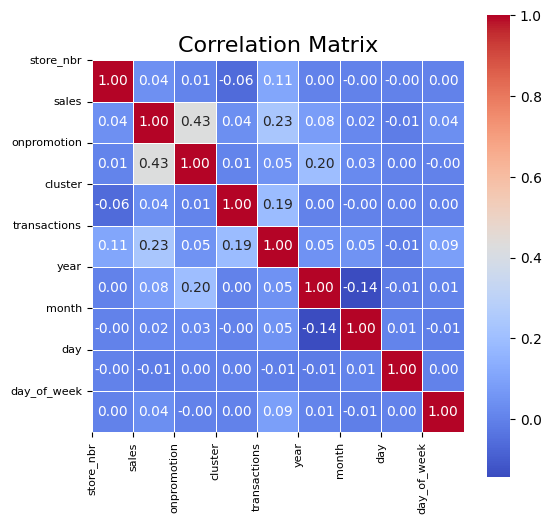

In [31]:
numeric_data = train.select_dtypes(include=[np.number])
corr_matrix = numeric_data.corr()

f = plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.7)
plt.xticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8, rotation=90)
plt.yticks(range(numeric_data.shape[1]), numeric_data.columns, fontsize=8)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [32]:
non_categ_variables = ["sales","transactions","onpromotion"]
categ_variables = ["type_y","cluster","month" ,"day" ,"day_of_week","family","city","state","store_nbr","year"]


In [33]:
train

,store_nbr,family,sales,onpromotion,city,state,type_y,cluster,transactions,year,month,day,day_of_week
0,46,CLEANING,2576.000,61,Quito,Pichincha,A,14,1.211507,2016,10,28,4
1,52,DAIRY,0.000,0,Manta,Manabi,A,11,-1.503843,2017,4,3,0
2,33,MEATS,357.354,2,Quevedo,Los Rios,C,3,-0.275508,2014,11,16,6
3,25,HOME AND KITCHEN I,5.000,0,Salinas,Santa Elena,D,1,-0.891117,2014,11,24,0
4,29,EGGS,0.000,0,Guayaquil,Guayas,E,10,-1.503843,2013,10,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748968,53,GROCERY II,0.000,0,Manta,Manabi,D,13,-1.503843,2013,12,16,0
2748969,11,HARDWARE,0.000,0,Cayambe,Pichincha,B,6,0.959643,2014,5,5,0
2748970,46,LAWN AND GARDEN,0.000,0,Quito,Pichincha,A,14,1.977624,2016,4,18,0
2748971,21,"LIQUOR,WINE,BEER",0.000,0,Santo Domingo,Santo Domingo de los Tsachilas,B,6,-1.503843,2013,1,12,5


In [34]:
for i in non_categ_variables:
    for j in categ_variables:
        print(train[[j,i]].groupby([j], as_index = False).mean().sort_values(by=i,ascending = True))
        print("\n\n")

  type_y       sales
2      C  197.734120
4      E  269.966298
1      B  327.884026
3      D  351.846784
0      A  710.137125



    cluster        sales
6         7   138.966306
2         3   195.076421
14       15   199.333476
15       16   240.994198
9        10   256.609834
1         2   261.522783
8         9   275.655435
3         4   298.097098
12       13   325.457661
0         1   325.862532
11       12   326.032211
5         6   343.643606
16       17   595.289428
10       11   607.067699
7         8   648.510833
13       14   710.988008
4         5  1130.191807



    month       sales
1       2  321.676632
7       8  337.203021
3       4  341.410186
0       1  341.995931
4       5  345.959174
5       6  351.665404
2       3  353.265549
8       9  361.637805
9      10  362.485366
10     11  376.525710
6       7  376.613430
11     12  457.118262



    day       sales
26   27  326.742615
24   25  328.470102
27   28  333.265520
12   13  337.419059
9    10  337.857621
25   26  

In [35]:
for i in non_categ_variables:
    if i != "sales":
        print(train[[i,"sales"]].groupby([i], as_index = False).mean().sort_values(by="sales",ascending = True))
        print("\n")

      transactions    sales
6732      3.872724      0.0
6919      5.176329      0.0
5947      3.017807      0.0
5422      2.632804      0.0
5374      2.596137      0.0
...            ...      ...
6471      3.480968  11068.0
6729      3.865005  11236.0
6726      3.857286  13029.0
6103      3.136492  14443.0
6353      3.361318  16355.0

[6971 rows x 2 columns]


     onpromotion         sales
265          279      0.000000
0              0    157.986636
1              1    469.213359
2              2    663.056443
3              3    871.045704
..           ...           ...
251          251  10599.315667
246          246  11490.971000
248          248  12169.133000
250          250  12231.239000
249          249  12377.413000

[349 rows x 2 columns]




In [36]:
def bar_plot(variable):
    var = train[variable]
    varValue = var.value_counts()
    plt.figure(figsize = (6,2))
    sns.barplot(x = train[variable],y = train["sales"])
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.title("{} and sales relation".format(variable))
    plt.show()
    print("{}: \n {}".format(variable,varValue))
    

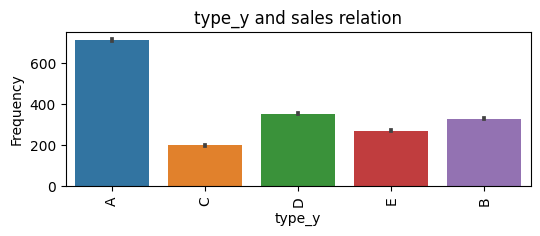

type_y: 
 type_y
D    916489
C    763390
A    458030
B    407268
E    203796
Name: count, dtype: int64


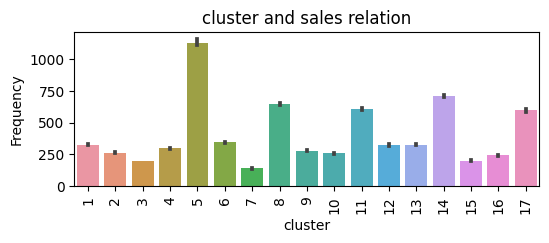

cluster: 
 cluster
3     356197
6     305496
10    305493
15    254525
13    203655
14    203562
4     152859
1     152803
8     152732
11    152567
9     101836
7     101822
2     101748
5      50953
17     50948
16     50931
12     50846
Name: count, dtype: int64


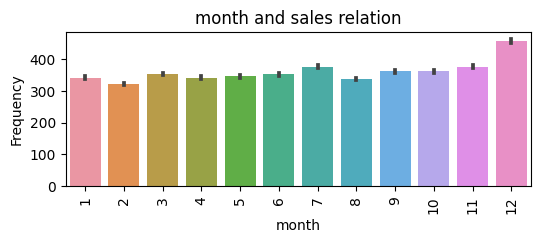

month: 
 month
7     258380
6     258137
5     256725
3     248682
1     248557
4     243967
2     225888
8     222867
12    200477
10    198694
11    194091
9     192508
Name: count, dtype: int64


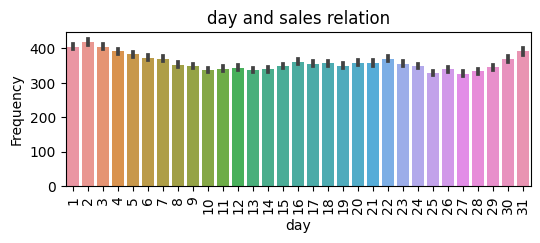

day: 
 day
25    99324
3     97764
12    94822
22    94715
14    91552
8     91430
1     91260
7     91242
10    90060
21    89911
15    89911
13    89881
26    89840
24    89814
2     89802
11    89780
6     89757
5     89728
9     89722
4     89677
18    88384
19    88280
23    88272
16    88189
28    88166
27    88147
20    88145
17    87923
29    81959
30    80248
31    51268
Name: count, dtype: int64


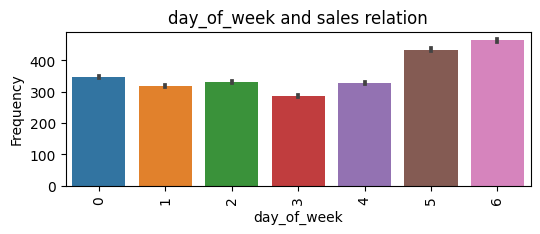

day_of_week: 
 day_of_week
6    397894
3    394716
5    392904
1    392833
2    391265
0    389721
4    389640
Name: count, dtype: int64


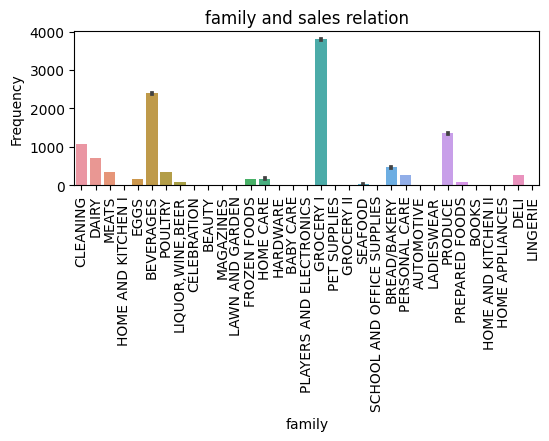

family: 
 family
BOOKS                         83491
LIQUOR,WINE,BEER              83455
DAIRY                         83451
CELEBRATION                   83413
HOME APPLIANCES               83410
LINGERIE                      83408
EGGS                          83407
DELI                          83396
PERSONAL CARE                 83372
PREPARED FOODS                83368
MAGAZINES                     83337
BABY CARE                     83327
POULTRY                       83321
BREAD/BAKERY                  83320
PET SUPPLIES                  83315
LADIESWEAR                    83309
BEVERAGES                     83304
HOME AND KITCHEN I            83298
LAWN AND GARDEN               83285
PRODUCE                       83269
AUTOMOTIVE                    83265
SEAFOOD                       83265
CLEANING                      83263
GROCERY I                     83245
HOME CARE                     83234
BEAUTY                        83229
GROCERY II                    83224
SCHOOL AND 

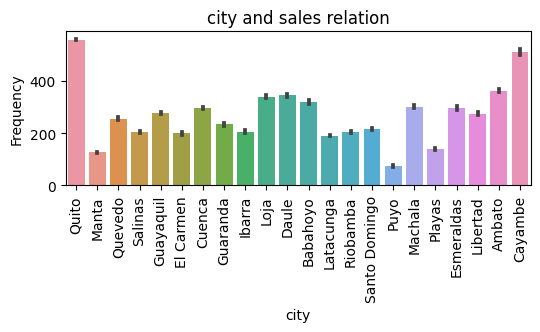

city: 
 city
Quito            916521
Guayaquil        407270
Santo Domingo    152805
Cuenca           152681
Latacunga        101755
Machala          101753
Ambato           101733
Manta            101615
Salinas           51074
Libertad          50998
Puyo              50981
Guaranda          50969
El Carmen         50968
Loja              50966
Cayambe           50929
Quevedo           50897
Esmeraldas        50876
Daule             50851
Ibarra            50849
Riobamba          50841
Babahoyo          50841
Playas            50800
Name: count, dtype: int64


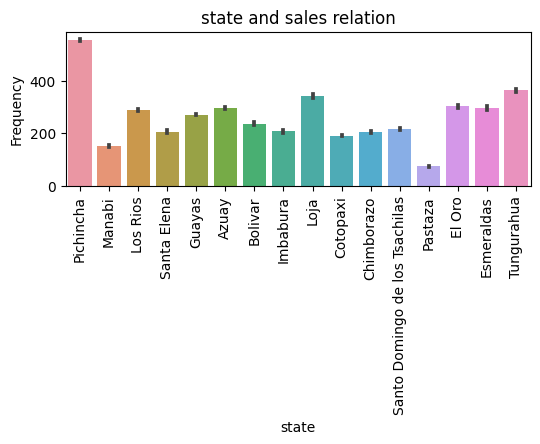

state: 
 state
Pichincha                         967450
Guayas                            559919
Santo Domingo de los Tsachilas    152805
Azuay                             152681
Manabi                            152583
Cotopaxi                          101755
El Oro                            101753
Los Rios                          101738
Tungurahua                        101733
Santa Elena                        51074
Pastaza                            50981
Bolivar                            50969
Loja                               50966
Esmeraldas                         50876
Imbabura                           50849
Chimborazo                         50841
Name: count, dtype: int64


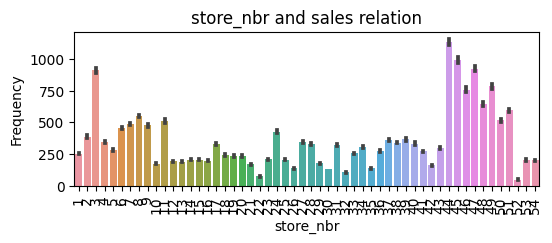

store_nbr: 
 store_nbr
25    51074
48    51018
13    51009
36    50998
2     50990
28    50985
22    50981
5     50972
19    50969
54    50968
8     50967
38    50966
7     50962
44    50953
10    50952
23    50949
51    50948
6     50946
20    50944
42    50944
1     50942
29    50937
39    50933
21    50932
18    50931
11    50929
30    50926
41    50921
47    50908
16    50901
33    50897
9     50891
4     50887
24    50878
43    50876
45    50875
32    50873
34    50867
26    50856
49    50854
46    50852
27    50851
15    50849
17    50846
14    50841
31    50841
52    50838
40    50832
37    50804
3     50803
35    50800
50    50784
53    50777
12    50746
Name: count, dtype: int64


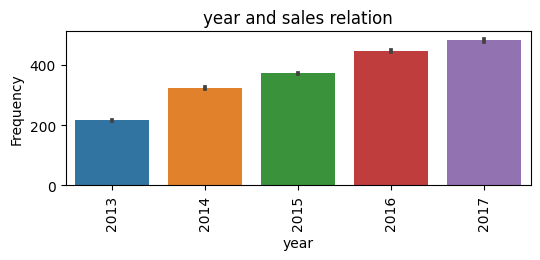

year: 
 year
2016    603085
2014    593086
2013    592106
2015    590172
2017    370524
Name: count, dtype: int64


In [37]:
for i in categ_variables:
    bar_plot(i)

In [38]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train[variable], bins = 150)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

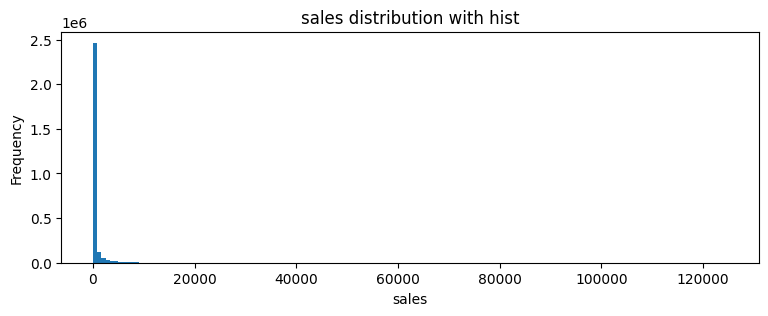

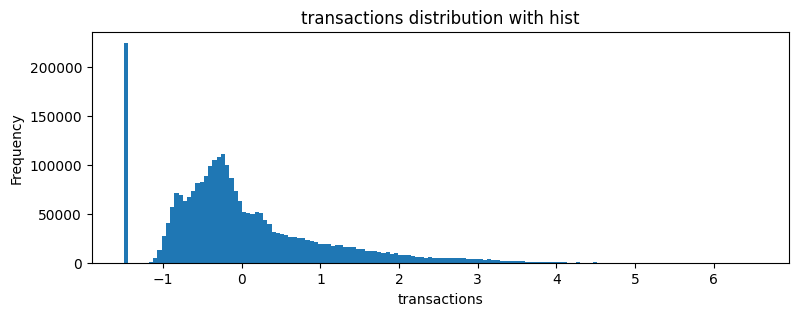

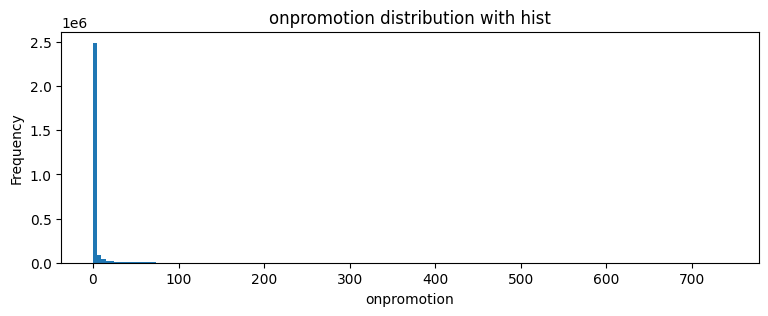

In [39]:
for n in non_categ_variables:
    plot_hist(n)

<Figure size 600x200 with 0 Axes>

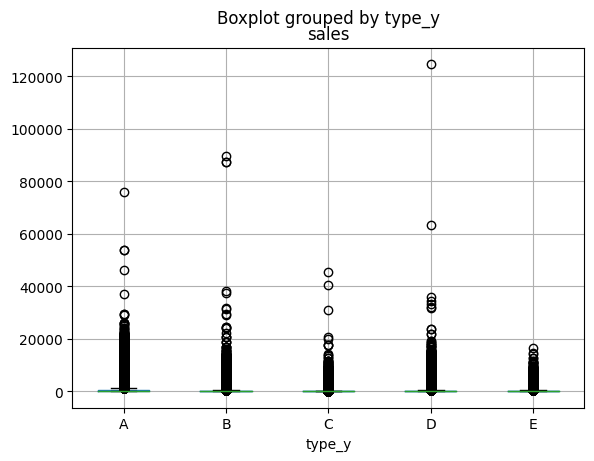

<Figure size 600x200 with 0 Axes>

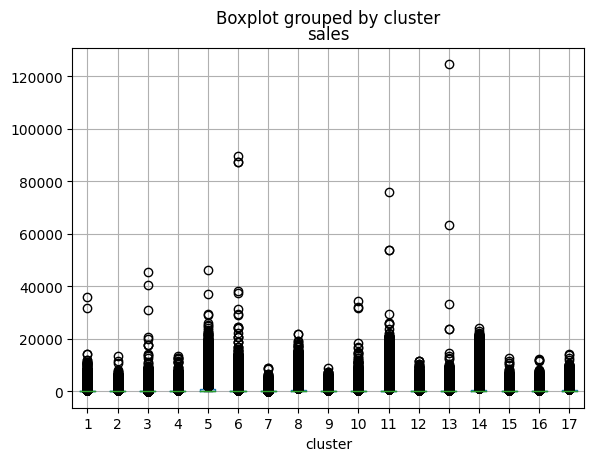

<Figure size 600x200 with 0 Axes>

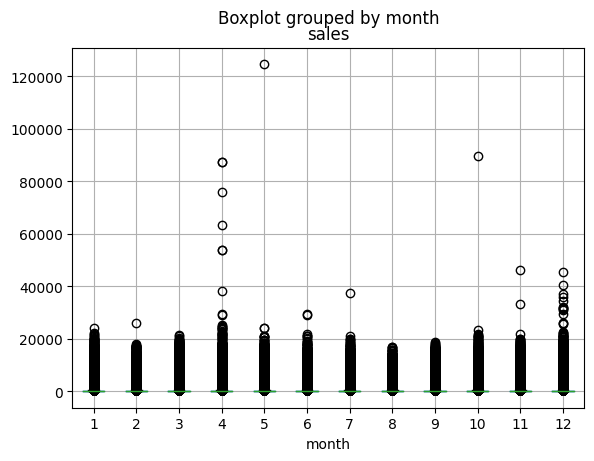

<Figure size 600x200 with 0 Axes>

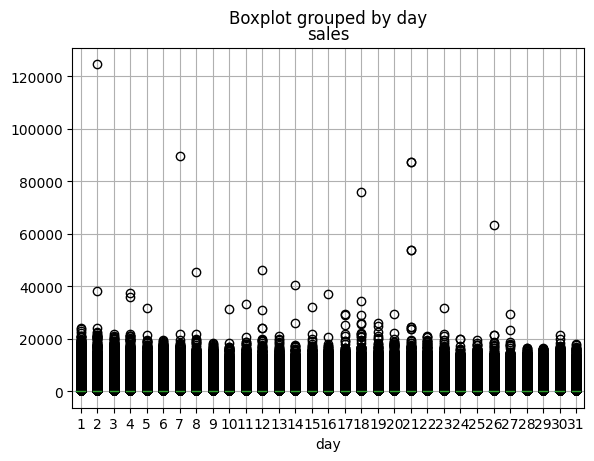

<Figure size 600x200 with 0 Axes>

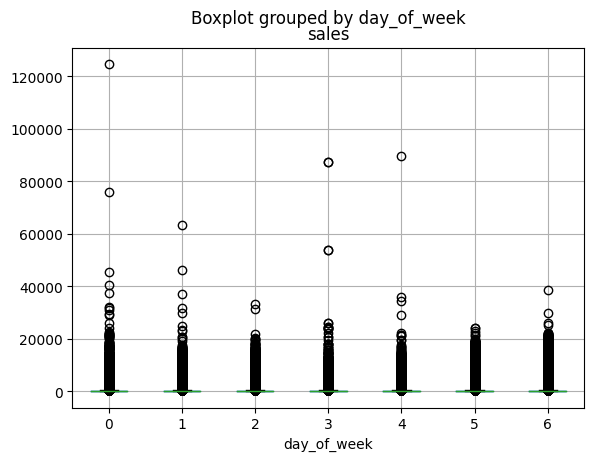

<Figure size 600x200 with 0 Axes>

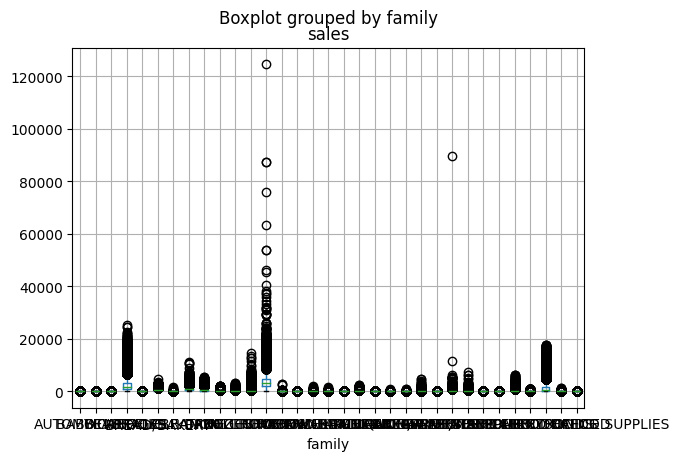

<Figure size 600x200 with 0 Axes>

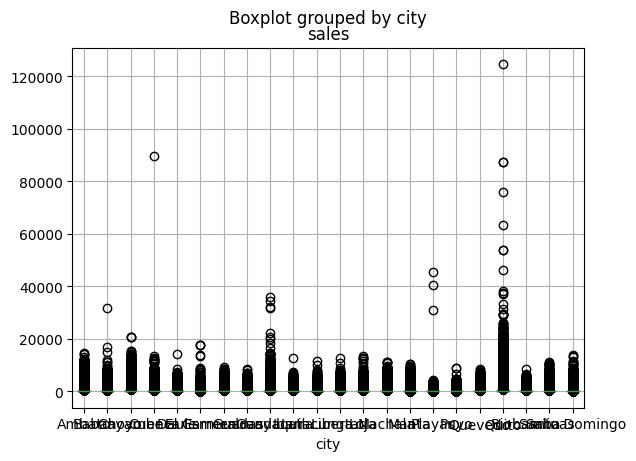

<Figure size 600x200 with 0 Axes>

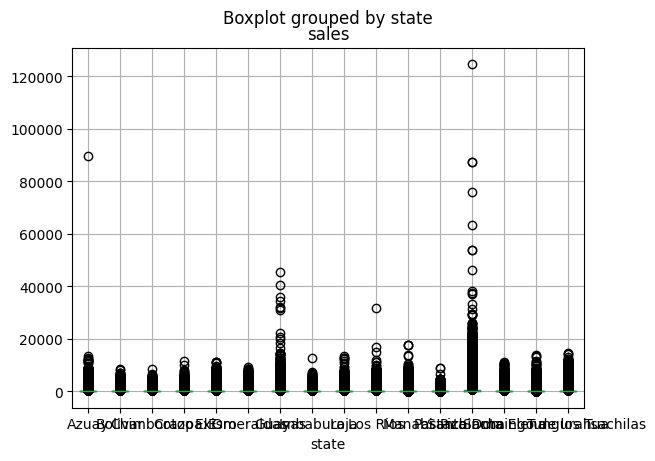

<Figure size 600x200 with 0 Axes>

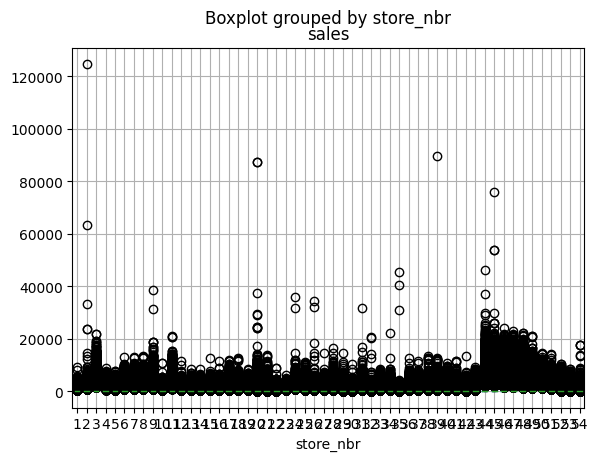

<Figure size 600x200 with 0 Axes>

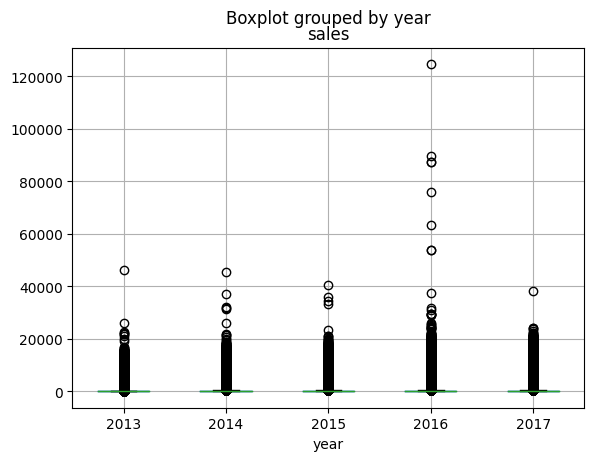

In [40]:
for i in categ_variables:
    plt.figure(figsize = (6,2))
    train.boxplot(column="sales",by = i)
    plt.show()

<a id ="7"></a>
# Encoding and Scaling for ML and DL

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train[['sales', 'onpromotion', 'cluster', 'transactions']] = scaler.fit_transform(train[['sales', 'onpromotion', 'cluster', 'transactions']])


In [42]:
train

,store_nbr,family,sales,onpromotion,city,state,type_y,cluster,transactions,year,month,day,day_of_week
0,46,CLEANING,1.999138,4.767798,Quito,Pichincha,A,1.186872,1.211454,2016,10,28,4
1,52,DAIRY,-0.323855,-0.213580,Manta,Manabi,A,0.541684,-1.503813,2017,4,3,0
2,33,MEATS,-0.001599,-0.050256,Quevedo,Los Rios,C,-1.178817,-0.275516,2014,11,16,6
3,25,HOME AND KITCHEN I,-0.319346,-0.213580,Salinas,Santa Elena,D,-1.608942,-0.891105,2014,11,24,0
4,29,EGGS,-0.323855,-0.213580,Guayaquil,Guayas,E,0.326622,-1.503813,2013,10,24,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2748968,53,GROCERY II,-0.323855,-0.213580,Manta,Manabi,D,0.971809,-1.503813,2013,12,16,0
2748969,11,HARDWARE,-0.323855,-0.213580,Cayambe,Pichincha,B,-0.533629,0.959597,2014,5,5,0
2748970,46,LAWN AND GARDEN,-0.323855,-0.213580,Quito,Pichincha,A,1.186872,1.977547,2016,4,18,0
2748971,21,"LIQUOR,WINE,BEER",-0.323855,-0.213580,Santo Domingo,Santo Domingo de los Tsachilas,B,-0.533629,-1.503813,2013,1,12,5


In [43]:
for i in train.columns:
    print(train[i].value_counts())
    print("\n\n")

store_nbr
25    51074
48    51018
13    51009
36    50998
2     50990
28    50985
22    50981
5     50972
19    50969
54    50968
8     50967
38    50966
7     50962
44    50953
10    50952
23    50949
51    50948
6     50946
20    50944
42    50944
1     50942
29    50937
39    50933
21    50932
18    50931
11    50929
30    50926
41    50921
47    50908
16    50901
33    50897
9     50891
4     50887
24    50878
43    50876
45    50875
32    50873
34    50867
26    50856
49    50854
46    50852
27    50851
15    50849
17    50846
14    50841
31    50841
52    50838
40    50832
37    50804
3     50803
35    50800
50    50784
53    50777
12    50746
Name: count, dtype: int64



family
BOOKS                         83491
LIQUOR,WINE,BEER              83455
DAIRY                         83451
CELEBRATION                   83413
HOME APPLIANCES               83410
LINGERIE                      83408
EGGS                          83407
DELI                          83396
PERSONAL CARE     

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748973 entries, 0 to 2748972
Data columns (total 13 columns):
 #   Column        Dtype  
---  ------        -----  
 0   store_nbr     int64  
 1   family        object 
 2   sales         float64
 3   onpromotion   float64
 4   city          object 
 5   state         object 
 6   type_y        object 
 7   cluster       float64
 8   transactions  float64
 9   year          int32  
 10  month         int32  
 11  day           int32  
 12  day_of_week   int32  
dtypes: float64(4), int32(4), int64(1), object(4)
memory usage: 230.7+ MB


In [45]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse=False, drop=None) 
encoded_store_nbr = encoder.fit_transform(train[['family']])
encoded_store_nbr_df = pd.DataFrame(encoded_store_nbr, columns=encoder.get_feature_names_out(['family']))
train = train.drop(columns=['family'])
train = pd.concat([train, encoded_store_nbr_df], axis=1)



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [46]:
train5 = train.copy()

In [47]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
train['city'] = le.fit_transform(train['city'])

In [48]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
train['state'] = le.fit_transform(train['state'])

In [49]:

from sklearn.preprocessing import LabelEncoder

# Label Encoding
le = LabelEncoder()
train['type_y'] = le.fit_transform(train['type_y'])

In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748973 entries, 0 to 2748972
Data columns (total 45 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   store_nbr                          int64  
 1   sales                              float64
 2   onpromotion                        float64
 3   city                               int64  
 4   state                              int64  
 5   type_y                             int64  
 6   cluster                            float64
 7   transactions                       float64
 8   year                               int32  
 9   month                              int32  
 10  day                                int32  
 11  day_of_week                        int32  
 12  family_AUTOMOTIVE                  float64
 13  family_BABY CARE                   float64
 14  family_BEAUTY                      float64
 15  family_BEVERAGES                   float64
 16  family_BOOKS      

<a id ="8"></a>
# Machine Learning and Deep Learning Methods

In [51]:
category1 = ['store_nbr', 'sales', 'onpromotion', 'city', 'state', 'type_y','cluster', 'transactions']

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

for i in category1:
    
    #x = data.drop("GPA",axis=1)
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    print("Label Name: {}".format(i))
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}')
    print("\n")

Label Name: store_nbr
Mean Squared Error: 160.38043465390297
R-squared: 0.34070125505696514


Label Name: sales
Mean Squared Error: 0.4030568788009393
R-squared: 0.5896903761674834


Label Name: onpromotion
Mean Squared Error: 0.7597914482913299
R-squared: 0.23771602434943917


Label Name: city
Mean Squared Error: 26.28677470767924
R-squared: 0.3286627115887849


Label Name: state
Mean Squared Error: 11.310963360916542
R-squared: 0.34889493520060566


Label Name: type_y
Mean Squared Error: 0.8597228196769673
R-squared: 0.40484802127540875


Label Name: cluster
Mean Squared Error: 0.8881308592174229
R-squared: 0.11182237924154237


Label Name: transactions
Mean Squared Error: 0.7070234369937841
R-squared: 0.2945369828834772




In [52]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures
category1 = ['store_nbr', 'sales', 'onpromotion', 'city', 'state', 'type_y','cluster', 'transactions']

for i in category1:
    
    x = train.drop(columns = i)
    y = train[i]
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred_linear = model.predict(x_test)
    
    poly = PolynomialFeatures(degree=1)
    x_poly_train = poly.fit_transform(x_train)
    x_poly_test = poly.fit_transform(x_test)
    
    model_poly = LinearRegression()
    model_poly.fit(x_poly_train,y_train)
    y_pred_poly = model_poly.predict(x_poly_test)

    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f'Label Name: {i}')
    print(f'Linear Regression - Mean Squared Error: {mse_linear}')
    print(f'Linear Regression - R-squared: {r2_linear}')
    print(f'Polynomial Regression - Mean Squared Error: {mse_poly}')
    print(f'Polynomial Regression - R-squared: {r2_poly}')
    print("\n")

Label Name: store_nbr
Linear Regression - Mean Squared Error: 160.38043465390297
Linear Regression - R-squared: 0.34070125505696514
Polynomial Regression - Mean Squared Error: 159.94385529775144
Polynomial Regression - R-squared: 0.3424959641322951


Label Name: sales
Linear Regression - Mean Squared Error: 0.4030568788009393
Linear Regression - R-squared: 0.5896903761674834
Polynomial Regression - Mean Squared Error: 0.4030252394925573
Polynomial Regression - R-squared: 0.5897225848045353


Label Name: onpromotion
Linear Regression - Mean Squared Error: 0.7597914482913299
Linear Regression - R-squared: 0.23771602434943917
Polynomial Regression - Mean Squared Error: 0.7597914482913298
Polynomial Regression - R-squared: 0.2377160243494394


Label Name: city
Linear Regression - Mean Squared Error: 26.28677470767924
Linear Regression - R-squared: 0.3286627115887849
Polynomial Regression - Mean Squared Error: 26.28677470767924
Polynomial Regression - R-squared: 0.3286627115887849


Label N

In [53]:
train.columns

Index(['store_nbr', 'sales', 'onpromotion', 'city', 'state', 'type_y',
       'cluster', 'transactions', 'year', 'month', 'day', 'day_of_week',
       'family_AUTOMOTIVE', 'family_BABY CARE', 'family_BEAUTY',
       'family_BEVERAGES', 'family_BOOKS', 'family_BREAD/BAKERY',
       'family_CELEBRATION', 'family_CLEANING', 'family_DAIRY', 'family_DELI',
       'family_EGGS', 'family_FROZEN FOODS', 'family_GROCERY I',
       'family_GROCERY II', 'family_HARDWARE', 'family_HOME AND KITCHEN I',
       'family_HOME AND KITCHEN II', 'family_HOME APPLIANCES',
       'family_HOME CARE', 'family_LADIESWEAR', 'family_LAWN AND GARDEN',
       'family_LINGERIE', 'family_LIQUOR,WINE,BEER', 'family_MAGAZINES',
       'family_MEATS', 'family_PERSONAL CARE', 'family_PET SUPPLIES',
       'family_PLAYERS AND ELECTRONICS', 'family_POULTRY',
       'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD'],
      dtype='object')

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
"""
category2 = [ 'type_y']
category1= ['store_nbr', 'sales', 'onpromotion', 'city', 'state', 'type_y','cluster', 'transactions']


    
y = train["type_y"]
x = train.drop(columns = "type_y")
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: family_MEATS')
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print("\n\n")
"""

'\ncategory2 = [ \'type_y\']\ncategory1= [\'store_nbr\', \'sales\', \'onpromotion\', \'city\', \'state\', \'type_y\',\'cluster\', \'transactions\']\n\n\n    \ny = train["type_y"]\nx = train.drop(columns = "type_y")\nx_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.2,random_state = 42)\nmodel = LogisticRegression(max_iter=1000)\nmodel.fit(x_train, y_train)\n\ny_pred = model.predict(x_test)\naccuracy = accuracy_score(y_test, y_pred)\nprint(f\'Accuracy: family_MEATS\')\nprint(f\'Accuracy: {accuracy}\')\nprint(classification_report(y_test, y_pred))\nprint("\n\n")\n'

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

"""
category1 = ["type_y"]

for col in category1:
    
    print(f"*** {col} Sütunu için KNN Regresyonu ***")
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = KNeighborsRegressor(n_neighbors=7)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")

"""

'\ncategory1 = ["type_y"]\n\nfor col in category1:\n    \n    print(f"*** {col} Sütunu için KNN Regresyonu ***")\n    x = train.drop(columns=[col])\n    y = train[col]\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n    \n    model = KNeighborsRegressor(n_neighbors=7)\n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    \n    rmse = mean_squared_error(y_test, y_pred, squared=False)\n    print(f"RMSE: {rmse}")\n    r2 = r2_score(y_test, y_pred)\n    print(f"R2 Score: {r2}")\n    print("\n")\n\n'

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

"""
category1 = ["type_y"]
for col in category1:
    
    print(f"*** {col}  for SVM ***")
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = SVR(kernel='linear') 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")
"""

'\ncategory1 = ["type_y"]\nfor col in category1:\n    \n    print(f"*** {col}  for SVM ***")\n    \n    x = train.drop(columns=[col])\n    y = train[col]\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n    \n   \n    model = SVR(kernel=\'linear\') \n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    rmse = mean_squared_error(y_test, y_pred, squared=False)\n    print(f"RMSE or MSE: {rmse}")\n    r2 = r2_score(y_test, y_pred)\n    print(f"R2 Score: {r2}")\n    print("\n")\n'

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report


"""
for col in ["type_y"]:
    
    print(f"*** {col}  for column Naive Bayes  ***")
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = GaussianNB() 
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")
"""

'\nfor col in ["type_y"]:\n    \n    print(f"*** {col}  for column Naive Bayes  ***")\n    x = train.drop(columns=[col])\n    y = train[col]\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n    \n    model = GaussianNB() \n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    \n    rmse = mean_squared_error(y_test, y_pred, squared=False)\n    print(f"RMSE or MSE: {rmse}")\n    r2 = r2_score(y_test, y_pred)\n    print(f"R2 Score: {r2}")\n    print("\n")\n'

In [58]:
"""value_counts_dict = {}

for column in data.columns:
    value_counts_dict[column] = data[column].value_counts()

for column, value_counts in value_counts_dict.items():
    print(f"Column: {column}")
    print(value_counts)
    print("\n")"""

'value_counts_dict = {}\n\nfor column in data.columns:\n    value_counts_dict[column] = data[column].value_counts()\n\nfor column, value_counts in value_counts_dict.items():\n    print(f"Column: {column}")\n    print(value_counts)\n    print("\n")'

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


"""
for col in ["type_y"]:
    print(f"*** {col} DecisionTreeClassifier for column  ***")
    
    
    x = train.drop(columns=[col])
    y = train[col]
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
   
    model = DecisionTreeClassifier(random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")
"""

'\nfor col in ["type_y"]:\n    print(f"*** {col} DecisionTreeClassifier for column  ***")\n    \n    \n    x = train.drop(columns=[col])\n    y = train[col]\n    \n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n    \n   \n    model = DecisionTreeClassifier(random_state=42)\n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    \n    rmse = mean_squared_error(y_test, y_pred, squared=False)\n    print(f"RMSE or MSE: {rmse}")\n    r2 = r2_score(y_test, y_pred)\n    print(f"R2 Score: {r2}")\n    print("\n")\n'

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

"""
for col in ["type_y"]:
    print(f"*** {col} RandomForestClassifier for column ***")
    
    
    x = train.drop(columns=[col])
    y = train[col]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    model = RandomForestClassifier(n_estimators=300, random_state=42)    
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f"RMSE or MSE: {rmse}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2}")
    print("\n")
"""

'\nfor col in ["type_y"]:\n    print(f"*** {col} RandomForestClassifier for column ***")\n    \n    \n    x = train.drop(columns=[col])\n    y = train[col]\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)\n    \n    model = RandomForestClassifier(n_estimators=300, random_state=42)    \n    model.fit(x_train, y_train)\n    y_pred = model.predict(x_test)\n    \n    rmse = mean_squared_error(y_test, y_pred, squared=False)\n    print(f"RMSE or MSE: {rmse}")\n    r2 = r2_score(y_test, y_pred)\n    print(f"R2 Score: {r2}")\n    print("\n")\n'

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
"""
df = train.copy()  
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

kmeans = KMeans(n_clusters=5, random_state=42)  
kmeans.fit(df_scaled)

cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels
centroids = kmeans.cluster_centers_
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

"""

"\ndf = train.copy()  \nscaler = StandardScaler()\ndf_scaled = scaler.fit_transform(df)\n\nkmeans = KMeans(n_clusters=5, random_state=42)  \nkmeans.fit(df_scaled)\n\ncluster_labels = kmeans.labels_\ndf['Cluster'] = cluster_labels\ncentroids = kmeans.cluster_centers_\npca = PCA(n_components=2)\ndf_pca = pca.fit_transform(df_scaled)\n\nplt.figure(figsize=(10, 7))\nplt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)\nplt.title('K-Means Clustering')\nplt.xlabel('PCA Component 1')\nplt.ylabel('PCA Component 2')\nplt.colorbar(label='Cluster')\nplt.show()\n\n"

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
"""
X = train.drop(columns=['sales'])  
y = train['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse', 'mae']) 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=1)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):",mse)
print("R-squared (R2) Score:", r2)
"""

'\nX = train.drop(columns=[\'sales\'])  \ny = train[\'sales\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nmodel = Sequential()\nmodel.add(Dense(128, input_dim=X_train.shape[1], activation=\'relu\'))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dense(64, activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dense(32, activation=\'relu\'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(1, activation=\'sigmoid\'))\n\noptimizer = Adam(learning_rate=0.001) \nmodel.compile(optimizer=optimizer, loss=\'mean_squared_error\', metrics=[\'mse\', \'mae\']) \nhistory = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=12, verbose=1)\ny_pred = model.predict(X_test)\n\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint("Mean Squared Error (MSE):",mse)\nprint("R-squared (R2) Score:", r2)\n'

In [63]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
"""
X = train.drop(columns=['sales']) 
y = train['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_reshaped = np.expand_dims(X_train, axis=1)
X_test_reshaped = np.expand_dims(X_test, axis=1)

model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(1, X_train.shape[1])),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)
y_pred = model.predict(X_test_reshaped)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) Score:", r2)
"""

'\nX = train.drop(columns=[\'sales\']) \ny = train[\'sales\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nX_train_reshaped = np.expand_dims(X_train, axis=1)\nX_test_reshaped = np.expand_dims(X_test, axis=1)\n\nmodel = tf.keras.Sequential([\n    tf.keras.layers.LSTM(50, activation=\'relu\', input_shape=(1, X_train.shape[1])),\n    tf.keras.layers.Dense(1)\n])\n\nmodel.compile(optimizer=\'adam\', loss=\'mse\')\nmodel.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)\ny_pred = model.predict(X_test_reshaped)\n\nmse = mean_squared_error(y_test, y_pred)\nr2 = r2_score(y_test, y_pred)\n\nprint("Mean Squared Error (MSE):", mse)\nprint("R-squared (R2) Score:", r2)\n'

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


"""
X = train.drop(columns=['type_y'])

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)

data['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Age', y='GPA', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering')
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)
"""

'\nX = train.drop(columns=[\'type_y\'])\n\nkmeans = KMeans(n_clusters=6, random_state=42)\nkmeans.fit(X)\n\ndata[\'Cluster\'] = kmeans.labels_\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=data, x=\'Age\', y=\'GPA\', hue=\'Cluster\', palette=\'viridis\', s=100)\nplt.title(\'K-Means Clustering\')\nplt.show()\n\nprint("Cluster Centers:")\nprint(kmeans.cluster_centers_)\n'

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
"""
X = train.drop(columns=['type_y'])
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

data['Cluster'] = fcluster(linked, t=6, criterion='maxclust')
plt.figure
"""

"\nX = train.drop(columns=['type_y'])\nlinked = linkage(X, method='ward')\n\nplt.figure(figsize=(10, 7))\ndendrogram(linked, labels=list(data.index))\nplt.title('Hierarchical Clustering Dendrogram')\nplt.xlabel('Sample index')\nplt.ylabel('Distance')\nplt.show()\n\ndata['Cluster'] = fcluster(linked, t=6, criterion='maxclust')\nplt.figure\n"

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
"""
X = train.drop(columns=['type_y'])
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X)
linked = linkage(X_pca, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=list(data.index))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

data['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Hierarchical Clustering with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()
"""

"\nX = train.drop(columns=['type_y'])\npca = PCA(n_components=6)\nX_pca = pca.fit_transform(X)\nlinked = linkage(X_pca, method='ward')\n\nplt.figure(figsize=(10, 7))\ndendrogram(linked, labels=list(data.index))\nplt.title('Hierarchical Clustering Dendrogram')\nplt.xlabel('Sample index')\nplt.ylabel('Distance')\nplt.show()\n\ndata['Cluster'] = fcluster(linked, t=3, criterion='maxclust')\n\nplt.figure(figsize=(10, 7))\nsns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)\nplt.title('Hierarchical Clustering with PCA')\nplt.xlabel('PCA Component 1')\nplt.ylabel('PCA Component 2')\nplt.legend(title='Cluster')\nplt.show()\n"